# Preparação de dados

## Dados utilizados

O conjunto de dados utilizado como base foi o [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ele é amplamente utilizado para análise e classificação de câncer de mama. Ele contém medições computacionais de características extraídas de imagens de massas celulares em exames de mamografia. As características foram calculadas a partir de imagens digitalizadas de aspirações por agulha fina (FNA), sendo usadas para prever se uma massa é maligna (câncer) ou benigna (não cancerígena). Estes dados foram disponibilizados no repositório [UCI Machine Learning](https://archive.ics.uci.edu/) e originalmente coletados pelo Dr. William H. Wolberg da University of Wisconsin Hospitals, Madison.

> Dados anotados **diretamente** por corpo médico regularmente registrado.

É preciso ter em mente que modelos de aprendizado de máquina implementados na área de saúde **sempre** devem:

- Ter sua acurácia acompanhada por retorno humano (Human Feedback)

- Ter explicabilidade (Explainability)

- Ter critérios de honestidade definidos (Fairness)

- (Para dados de Brasileiros) Obedecer a LGPD para treinamento do modelo e inferência dos dados

- (Na União Européia) Obedecer a GPDR para treinamento do modelo e inferência dos dados

- (Nos Estados Unidos) Obedecer a HIPAA para treinamento do modelo e inferência dos dados

## Importar bibliotecas

In [167]:
import os
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from faker import Faker
import random

## Baixar dados

In [145]:
# Link para o dataset
url = "https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip"

# Pasta de destino onde o arquivo será descompactado
dest_folder = "data/breast_cancer"

# Arquivo zip de destino
dest_zip_file = os.path.join(dest_folder, "breast_cancer.zip")

# Arquivo parquet de destino
dest_parquet_file = os.path.join(dest_folder, "breast_cancer.parquet")

# Arquivo parquet de destino
dest_parquet_laudos_file = os.path.join(dest_folder, "breast_cancer_laudos.parquet")

if not os.path.exists(dest_folder):

    # Crie a pasta se ela não existir
    print(f"Criando a pasta {dest_folder}...")
    os.makedirs(dest_folder, exist_ok=True)

    # Faça o download e salve o arquivo
    print("Baixando o dataset...")
    response = requests.get(url)
    response.raise_for_status()  # Levanta um erro se o download falhar

    with open(dest_zip_file, "wb") as f:
        f.write(response.content)
    print(f"Download concluído e salvo em {dest_zip_file}")

    # Descompacte o arquivo
    print("Descompactando o arquivo...")
    with zipfile.ZipFile(dest_zip_file, 'r') as zip_ref:
        zip_ref.extractall(dest_folder)

    print(f"Arquivos descompactados em {dest_folder}")
else:
    print(f"Os arquivos já existem em {dest_folder}")

Os arquivos já existem em data/breast_cancer


## Ajustar colunas

In [146]:
# Caminho para os arquivos de dados e nomes
data_file = os.path.join(dest_folder, "wdbc.data")

# Carregar os dados
data = pd.read_csv(data_file, header=None, sep=",")

# 12 primeiras colunas
data = data.iloc[:, :12]

# Definir os nomes das colunas
column_names = [
    "id_number",
    "diagnosis",
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave points",
    "symmetry",
    "fractal dimension"
]

# Definir os nomes das colunas no DataFrame
data.columns = column_names

# Adicionar coluna diagnosis_y com valores 0 e 1
data['diagnosis_y'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Exibir as primeiras linhas do DataFrame
data.head()

,id_number,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,diagnosis_y
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


## Salvar dados

In [147]:
# salvar dataframe em um arquivo parquet na pasta data
data.to_parquet(dest_parquet_file)

# Análise exploratória dos dados

## Formato dos dados

In [148]:
data.shape

(569, 13)

## Mostrar informações

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_number          569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius             569 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   concave points     569 non-null    float64
 10  symmetry           569 non-null    float64
 11  fractal dimension  569 non-null    float64
 12  diagnosis_y        569 non-null    int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 57.9+ KB


## Estatísticas descritivas

In [150]:
data.describe()

,id_number,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,diagnosis_y
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


## Verificar valores ausentes

In [151]:
data.isnull().sum()

id_number            0
diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave points       0
symmetry             0
fractal dimension    0
diagnosis_y          0
dtype: int64

## Balanceamento das classes

In [166]:
data["diagnosis"].value_counts()

diagnosis
B    351
M    218
Name: count, dtype: int64

## Distribuição por diagnóstico

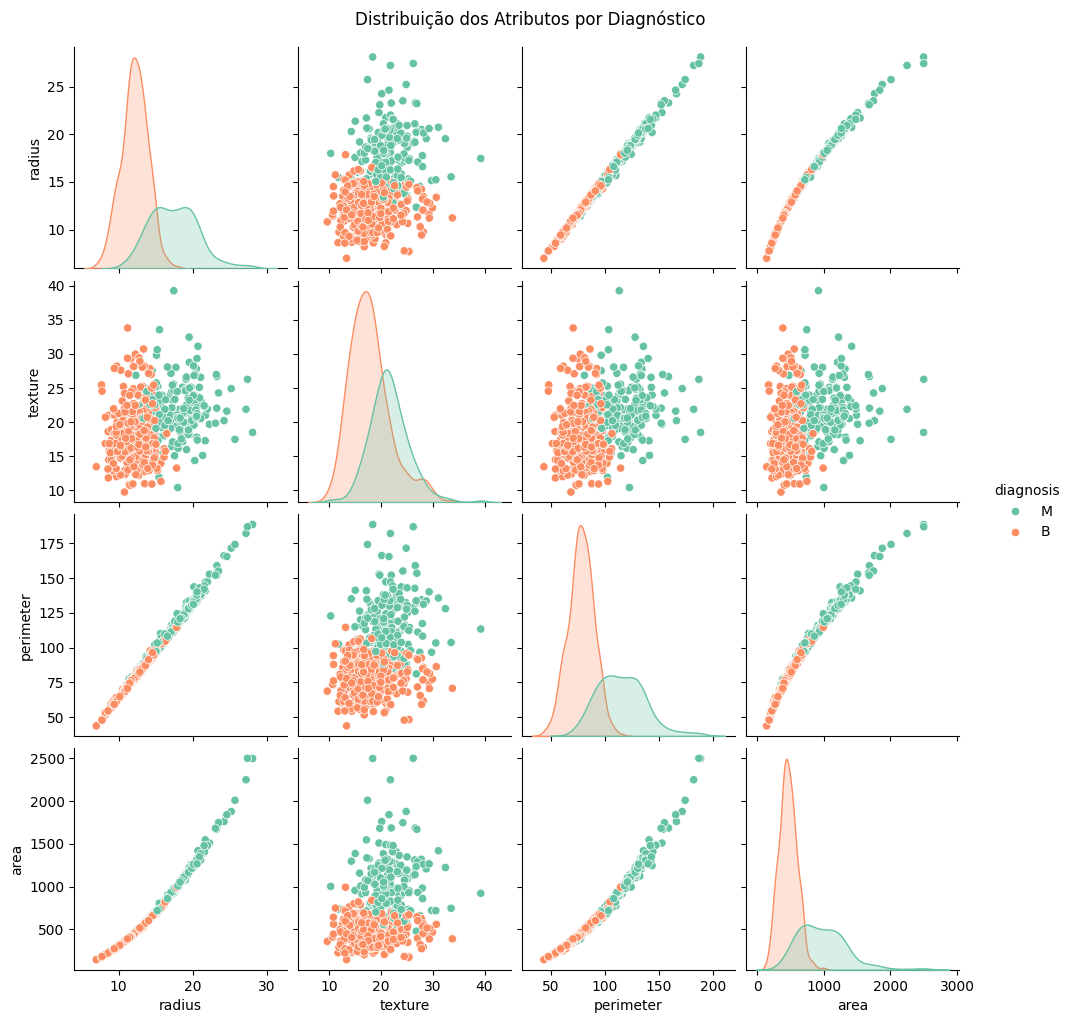

In [ ]:
# Plotar a distribuição dos atributos por diagnóstico
sns.pairplot(data, hue='diagnosis', vars=['radius', 'texture', 'perimeter', 'area'], palette='Set2')
plt.suptitle("Distribuição dos Atributos por Diagnóstico", y=1.02)
plt.show()

## Correlação entre features

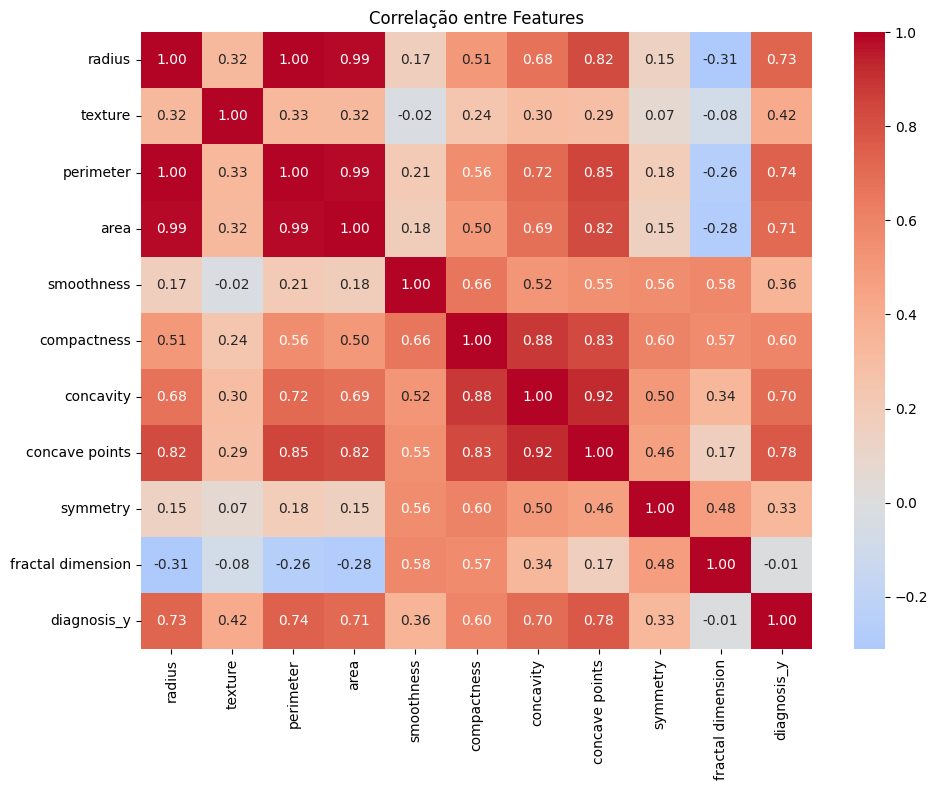

In [152]:
numeric_cols = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension', 'diagnosis_y']

correlation_matrix = data.drop(['id_number', 'diagnosis'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlação entre Features')
plt.tight_layout()
plt.show()

## Distribuição das features

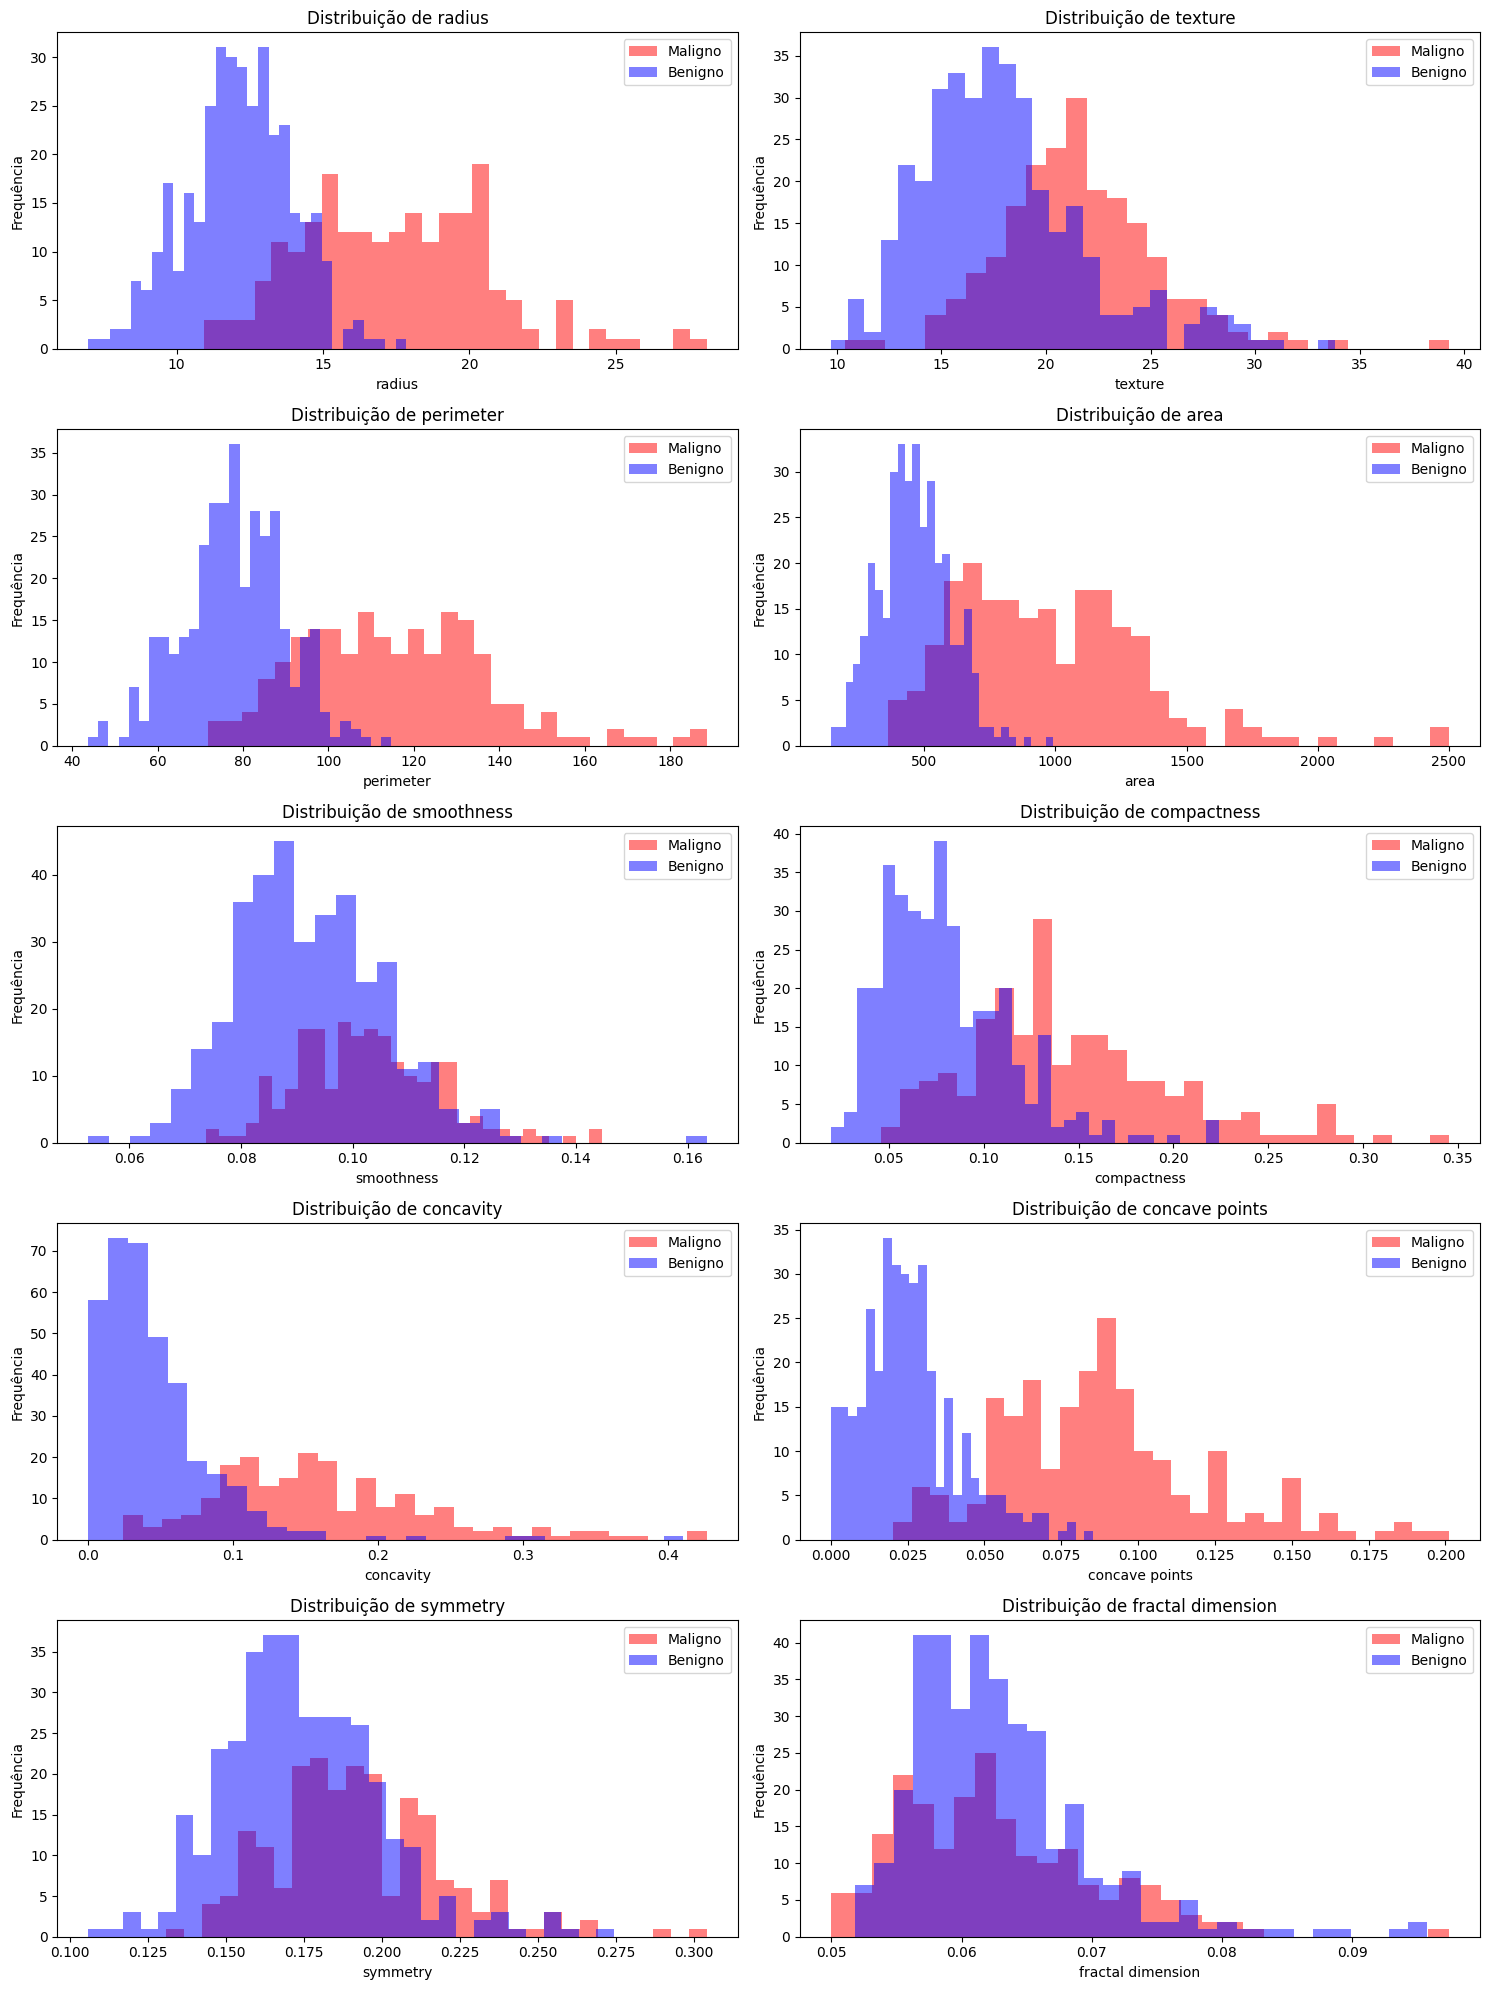

In [153]:
numeric_cols = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(data[data['diagnosis'] == 'M'][col], alpha=0.5, label='Maligno', bins=30, color='red')
    axes[idx].hist(data[data['diagnosis'] == 'B'][col], alpha=0.5, label='Benigno', bins=30, color='blue')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência')
    axes[idx].legend()
    axes[idx].set_title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

## Boxplots para identificar outliers

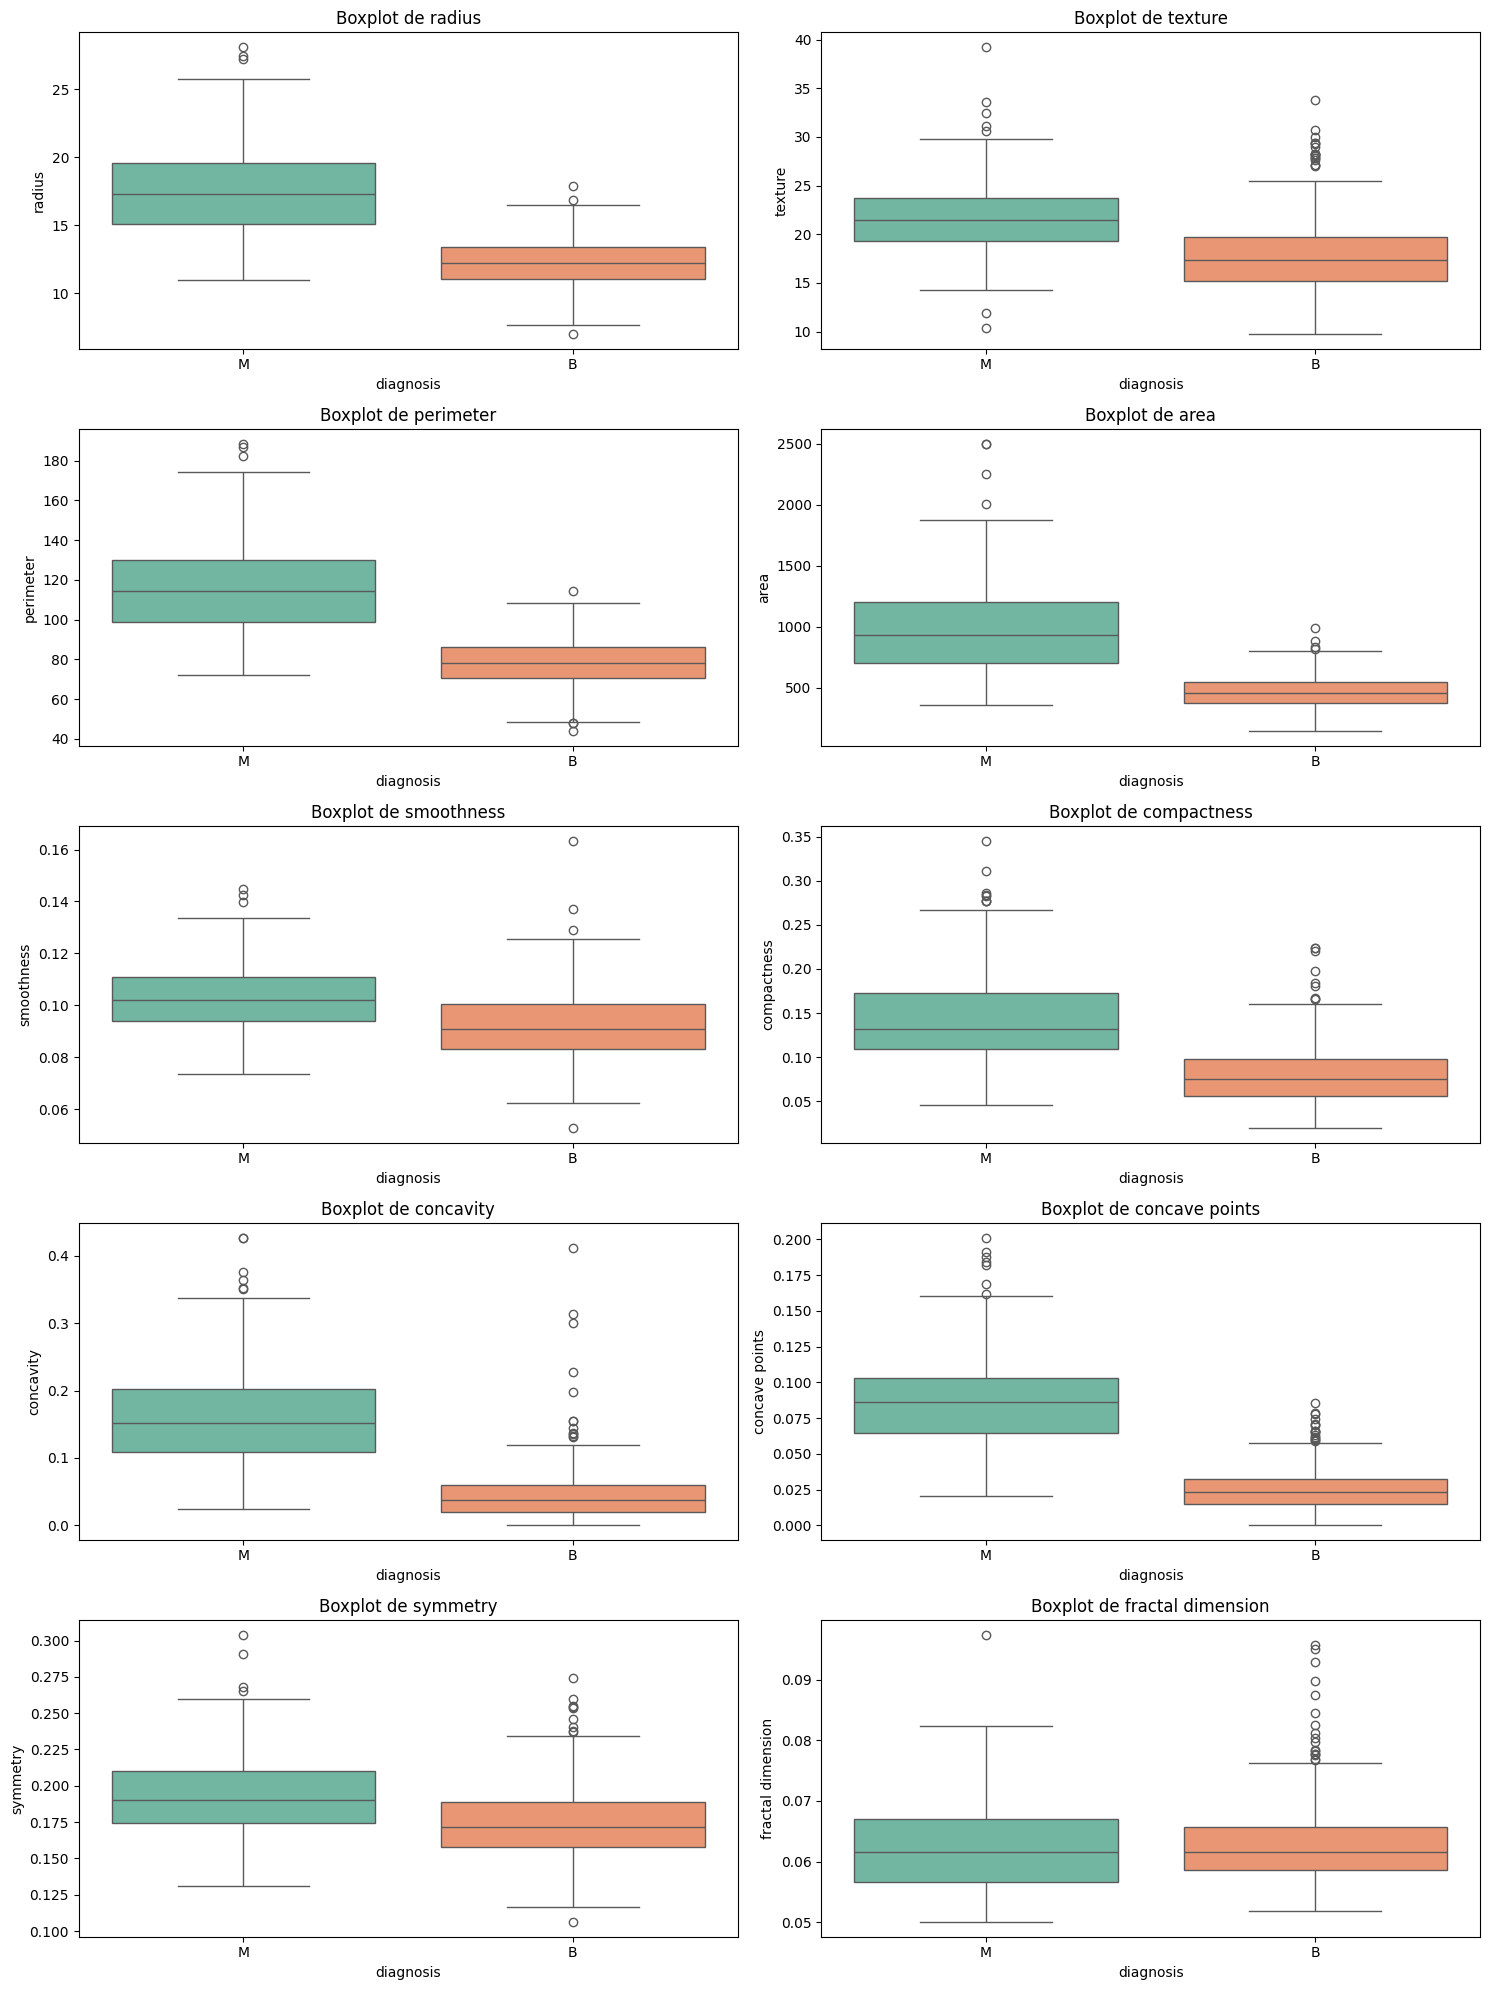

In [154]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=data, x='diagnosis', y=col, hue='diagnosis', ax=axes[idx], palette='Set2', legend=False)
    axes[idx].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

# Extra: Dados sintéticos

## Gerar laudos baseado nos dados

In [160]:
fake = Faker('pt_BR')

# Função para traduzir o diagnóstico
def traduzir_diagnostico(diagnostico):
    return "Benigno" if diagnostico == "B" else "Maligno"

# Função para gerar laudo
def gerar_laudo(row):
    paciente = fake.name()
    tamanho = round(row['radius'] * 2, 1)
    textura = "regular" if row['texture'] < 20 else "irregular"
    quadrante = random.choice(["superior esquerdo", "superior direito", "inferior esquerdo", "inferior direito"])
    diagnostico = traduzir_diagnostico(row['diagnosis'])

    return f"""
        Paciente: {paciente}
        Exame: Mamografia
        Data do Exame: {fake.date_this_year()}

        Descrição:
        Observou-se uma lesão de aproximadamente {tamanho} mm, localizada no quadrante {quadrante}, com bordas {textura}.
        O exame sugere que a lesão apresenta características {diagnostico.lower()}.

        Conclusão: {diagnostico}.
        Recomendação: {('Acompanhar evolução com novo exame em 6 meses' if diagnostico == 'Benigno' else 'Encaminhar para biópsia e avaliação oncológica')}.
        """

# Aplicar em todas as linhas do dataset
data['laudo'] = data.apply(gerar_laudo, axis=1)

## Verificar laudos gerados

In [161]:
# Mostre apenas as colunas diagnosis e laudo
data[['id_number','diagnosis', 'laudo']].head()

,id_number,diagnosis,laudo
0,842302,M,\n Paciente: Isabella Andrade\n ...
1,842517,M,\n Paciente: Juliana da Paz\n Ex...
2,84300903,M,\n Paciente: Letícia da Luz\n Ex...
3,84348301,M,\n Paciente: Bella Barros\n Exam...
4,84358402,M,\n Paciente: José Miguel Monteiro\n ...


In [162]:
# Mostre o texto completo do laudo para os primeiros 3 diagnósticos malignos
for laudo in data[data['diagnosis'] == 'M']['laudo'].head(3):
    print(laudo)
    print("=" * 80)


        Paciente: Isabella Andrade
        Exame: Mamografia
        Data do Exame: 2025-09-12

        Descrição:
        Observou-se uma lesão de aproximadamente 36.0 mm, localizada no quadrante inferior esquerdo, com bordas regular.
        O exame sugere que a lesão apresenta características maligno.

        Conclusão: Maligno.
        Recomendação: Encaminhar para biópsia e avaliação oncológica.
        

        Paciente: Juliana da Paz
        Exame: Mamografia
        Data do Exame: 2025-07-26

        Descrição:
        Observou-se uma lesão de aproximadamente 41.1 mm, localizada no quadrante inferior direito, com bordas regular.
        O exame sugere que a lesão apresenta características maligno.

        Conclusão: Maligno.
        Recomendação: Encaminhar para biópsia e avaliação oncológica.
        

        Paciente: Letícia da Luz
        Exame: Mamografia
        Data do Exame: 2025-04-10

        Descrição:
        Observou-se uma lesão de aproximadamente 39.4 mm, l

In [163]:
# Mostre o texto completo do laudo para os primeiros 3 diagnósticos benignos
for laudo in data[data['diagnosis'] == 'B']['laudo'].head(3):
    print(laudo)
    print("=" * 80)


        Paciente: Dr. Kaique Cassiano
        Exame: Mamografia
        Data do Exame: 2025-05-25

        Descrição:
        Observou-se uma lesão de aproximadamente 27.1 mm, localizada no quadrante inferior esquerdo, com bordas regular.
        O exame sugere que a lesão apresenta características benigno.

        Conclusão: Benigno.
        Recomendação: Acompanhar evolução com novo exame em 6 meses.
        

        Paciente: Kevin Jesus
        Exame: Mamografia
        Data do Exame: 2025-06-15

        Descrição:
        Observou-se uma lesão de aproximadamente 26.2 mm, localizada no quadrante superior esquerdo, com bordas regular.
        O exame sugere que a lesão apresenta características benigno.

        Conclusão: Benigno.
        Recomendação: Acompanhar evolução com novo exame em 6 meses.
        

        Paciente: Raquel Caldeira
        Exame: Mamografia
        Data do Exame: 2025-04-27

        Descrição:
        Observou-se uma lesão de aproximadamente 19.0 mm, l

## Adicionar Ruido

In [164]:
# Introduzir ruído nos dados
def adicionar_ruido(row):

    # row['radius'] += random.uniform(-1, 1)  # Pequeno ajuste aleatório no raio
    # row['texture'] += random.uniform(-1, 1)  # Pequeno ajuste aleatório na textura

    if random.random() < 0.05:  # 5% de chance de alterar o diagnóstico
        row['diagnosis'] = "B" if row['diagnosis'] == "M" else "M"

    return row

data = data.apply(adicionar_ruido, axis=1)

## Salvar dados

In [165]:
# salvar dataframe em um arquivo parquet na pasta data
data.to_parquet(dest_parquet_laudos_file)